## Verileri oluşturma


*   Git üzerinden verileri sisteme indirme
*   Sistemde verilerinin konumunu öğrenme




In [2]:
# Verileri indirme
!git clone https://github.com/otobil-iu/track

Cloning into 'track'...
remote: Enumerating objects: 12163, done.
remote: Total 12163 (delta 0), reused 0 (delta 0), pack-reused 12163
Receiving objects: 100% (12163/12163), 156.98 MiB | 28.06 MiB/s, done.
Checking out files: 100% (12160/12160), done.


In [3]:
# Verilerinin dizin ve yol bilgisini öğrenme
!ls track

driving_log.csv  IMG


## Gerekli kütüphaneleri tanımalama


*   `Numpy` matrix işlemleri
*   `Matplotlib.pyplot` grafik / çizim işlemleri
*   `Keras` Makine öğrenimi
*   `cv2` Görüntü işleme (openCV)
*   `pandas` Veri analizi
*   `random` Rastgelelik







In [4]:
# Matrix işlemleri
import numpy as np

# Grafik & Çizim işlemleri
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Makine öğrenimi
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, Dropout, Flatten, Dense

# Görüntü işleme (openCV)
import cv2

# Veri analizi
import pandas as pd

# Dosya yolu işlemleri
import os
import ntpath

# Rastgelelik işlemleri
import random

# Veri işleme metodları
from sklearn.utils import shuffle # Karıştırma
from sklearn.model_selection import train_test_split # Parçalayıp uygun forma sokma

Using TensorFlow backend.


## Verileri işleme

* Veri yolu ve veriinin sütunlarını isimlendirme
* Dosya yolundan dosya adını alma ve verileri güncelleme
* Verileri görselleştirme (bar grafik yöntemi ile)


In [5]:
# Veri dosyasının adı
veri_dizini = 'track'
veri_dosyasi = "driving_log.csv" #!ls track ile buluyoruz.

# Sütunları indeksleme
MERKEZ_SUTUNU_INDEKSI = 0
SOL_SUTUN_INDEKSI = 1
SAG_SUTUN_INDEKSI = 2
DIREKSIYON_SUTUNU_INDEKSI = 3

# Sütun isimleri
MERKEZ_SUTUNU_ISMI = "Merkez"
SOL_SUTUN_ISMI = "Sol"
SAG_SUTUN_ISMI = "Sag"
DREKSIYON_SUTUNU_ISMI = "Direksiyon"
GAZ_SUTUNU_ISMI = "Gaz"
FREN_SUTUNU_ISMI = "Fren"
HIZ_SUTUNU_ISMI = "Hiz"

# Verideki sütunların adlarını tanımalama
# Steerring: Direksiyon (- sol, + sağ)
# Throttin: Gaz
# Reverse: Ters gitme verisi (?)
# Speed: Hız
veri_sutunlari = [
    MERKEZ_SUTUNU_ISMI, 
    SOL_SUTUN_ISMI, 
    SAG_SUTUN_ISMI, 
    DREKSIYON_SUTUNU_ISMI, 
    GAZ_SUTUNU_ISMI, 
    FREN_SUTUNU_ISMI, 
    HIZ_SUTUNU_ISMI
]



# Verileri okuyup, sütunlarına tanımlanan isimleri verme
veri = pd.read_csv(os.path.join(veri_dizini, veri_dosyasi), names = veri_sutunlari)

# Sütun uzunlarını 'doldur' olarak ayarlama
pd.set_option('display.max_colwidth', -1)

# Verilerin başına bakmak
veri.head()

,Merkez,Sol,Sag,Direksiyon,Gaz,Fren,Hiz
0,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_382.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_382.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_670.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_670.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_724.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_724.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_792.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_792.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_860.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_860.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


In [0]:
# Dosya yolundan dosya ismini döndürür
def dosya_adi_al(dosya_yolu):
  # Dosya bilgisini yolundan alma
  dizin_yolu, dosya_adi = ntpath.split(dosya_yolu)
  return dosya_adi

In [7]:
# Verilerin ismini kırpma
veri[MERKEZ_SUTUNU_ISMI] = veri[MERKEZ_SUTUNU_ISMI].apply(dosya_adi_al)
veri[SOL_SUTUN_ISMI] = veri[SOL_SUTUN_ISMI].apply(dosya_adi_al)
veri[SAG_SUTUN_ISMI] = veri[SAG_SUTUN_ISMI].apply(dosya_adi_al)

# Verilerin başını gösterme
veri.head()

,Merkez,Sol,Sag,Direksiyon,Gaz,Fren,Hiz
0,center_2018_07_16_17_11_43_382.jpg,left_2018_07_16_17_11_43_382.jpg,right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,center_2018_07_16_17_11_43_670.jpg,left_2018_07_16_17_11_43_670.jpg,right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,center_2018_07_16_17_11_43_724.jpg,left_2018_07_16_17_11_43_724.jpg,right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,center_2018_07_16_17_11_43_792.jpg,left_2018_07_16_17_11_43_792.jpg,right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,center_2018_07_16_17_11_43_860.jpg,left_2018_07_16_17_11_43_860.jpg,right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


## Verileri dengeleme
0 açısı için çok fazla veri olduğundan genelleme işlemi iyi çalışmaz. Makine her zaman düz gitmeye çalışır dönüşlerden kaçınır. Bu sebeple daha genel veriler elde etmek için resmin üst kısmını kırpmamız ve dağılımı birbirine yakınlaştırmamız lazım.


<Container object of 25 artists>

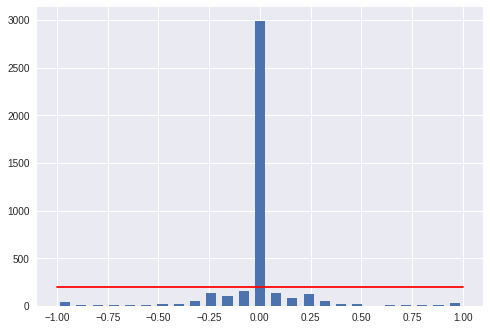

In [8]:
# Grafikteki çubuk sayısı (num_bins)
cubuk_sayisi = 25

# Bir değer için alınacak en fazla örnek sayısı (Genelleştirmeyi korumak için)
veri_ornek_limiti = 200

# Verileri istenen parçaya ayırma (hist, bins)
grafik, cubuklar = np.histogram(veri[DREKSIYON_SUTUNU_ISMI], cubuk_sayisi)

# Merkez verisini 0 olacak şekilde ayarlama
# (İlk veri hariç tüm veriler + Son veri hariç tüm veriler) / 2
cubuk_merkezi = (cubuklar[:-1] + cubuklar[1:]) / 2

# Veri sınır çizgisini çizdirme (x1, x2, y1, y2)
plt.plot((np.min(veri[DREKSIYON_SUTUNU_ISMI]), np.max(veri[DREKSIYON_SUTUNU_ISMI])), (veri_ornek_limiti, veri_ornek_limiti), 'r')

# Verileri çubuk grafikte çizdirme
plt.bar(cubuk_merkezi, grafik, width=0.05)

###  Veri kesme işlemi
Verilerin düzensiz olmasından kaynaklı belli başlı veriler kırpılmalı. (Kırmızı çizginin üstündekiler.) 

Kırpma işlemini yapmak için;


* Veriler arasındaki bağlantının kopmaması adına veriler karıştırılır.
* Karışık verilerin üstü kırpılır.
* Orjinal veriden çıkarılması gereken karışık veriler, indexleriyle çıkarılır.



In [0]:
# Kırpma işlemi birden fazla gerçekleşirse hata verir o sebeple boolean kontrolü ekliyoruz
kirpildiMi = False

Toplam veri: 4053
Kaldırılacak veri: 2790
Verinin son hali:  1263


<Container object of 25 artists>

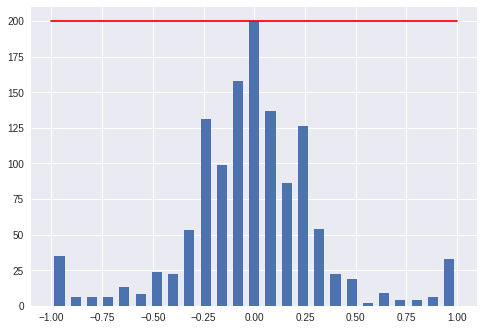

In [10]:
if not kirpildiMi:
  # Düzeltimemiş verinin içerik saysını gösterme
  print('Toplam veri:', len(veri[DREKSIYON_SUTUNU_ISMI]))

  # Kaldırılacak listesi tanımala
  kaldirilacak_liste = []

  for i in range(cubuk_sayisi):
    # Geçici listeyi oluşturma
    gecici_liste = []

    # Her bir direksiyon açı verisini eğer oluşturulan çubuklar arasındaysa listeye ekliyoruz
    for j in range(len(veri[DREKSIYON_SUTUNU_ISMI])):
      if veri[DREKSIYON_SUTUNU_ISMI][j] >= cubuklar[i] and veri[DREKSIYON_SUTUNU_ISMI][j] <= cubuklar[i+1]:
        gecici_liste.append(j)

    # Veri kopukluğu olmaması adına listesyi karıştırıp sileceğiz
    gecici_liste = shuffle(gecici_liste) # sklearn.utils'den shuffle kullanıldı.

    # Sınır sayımızdan sonraki verileri alıyoruz (kaldırmak için)
    gecici_liste = gecici_liste[veri_ornek_limiti:]

    # Geçici verileri silinecek verilerin indekslerinin tutulduğu yerde saklama
    kaldirilacak_liste.extend(gecici_liste)


  print("Kaldırılacak veri:", len(kaldirilacak_liste))

  # Kaldırılmasını istedimiz verileri indekslerin tutulduğu diziyle kaldırma
  # inplace: üzerine yazma veya üzerinde saklama (?) 
  veri.drop(veri.index[kaldirilacak_liste], inplace=True)

  print("Verinin son hali: ", len(veri[DREKSIYON_SUTUNU_ISMI]))

  # Kırpma işlemi tamamlandığından güvenlik için kırpıldı değerini true yapıyoruz.
  kirpildiMi = True;

  # Histogramı güncelleme
  grafik, _ = np.histogram(veri[DREKSIYON_SUTUNU_ISMI], (cubuk_sayisi))

# Veri sınır çizgisini çizdirme (x1, x2, y1, y2)
plt.plot((np.min(veri[DREKSIYON_SUTUNU_ISMI]), np.max(veri[DREKSIYON_SUTUNU_ISMI])), (veri_ornek_limiti, veri_ornek_limiti), 'r')

# Verileri çubuk grafikte çizdirme
plt.bar(cubuk_merkezi, grafik, width=0.05)

###  Verileri train ve validation olarak parçalara ayırma
Verileri daha sağlıklı makine öğrenimi için gerekli olan train-validation parçalarına ayırıyoruz. 

In [0]:
def direksiyon_resimlerini_yükle(veri_dizini, veri):
  # Direksiyon değerlerinin resimlerinin ekleneceği dizi
  resim_yollari = []
  # Direksiyon değerlerinin kayıt edileceği dizi
  direksiyonlar = []
  
  # Tüm verilerden eşleme yapıyoruz
  for i in range(len(veri)):
    # Veri içerisindeki i. satırı değişkene atıyoruz
    indeksli_veri = veri.iloc[i];
    
    # Gerekli verileri satır değişkeninden çekiyoruz
    merkez, sol, sag = indeksli_veri[MERKEZ_SUTUNU_INDEKSI], indeksli_veri[SOL_SUTUN_INDEKSI], indeksli_veri[SAG_SUTUN_INDEKSI]
    direksiyon = indeksli_veri[DIREKSIYON_SUTUNU_INDEKSI]
    
    # Çekilen verileri dizilere ekleme
    # Yol eklerken sistem yoluna (os.path...) strip işlemi yapılmış veri. (Boşluk gibi sorun oluşturabilecek karakterleri engellemek için)
    resim_yollari.append(os.path.join(veri_dizini, merkez.strip())) # Şimdilik sadece merkez'i aldık (?)
    direksiyonlar.append(direksiyon)
    
  # Dizileri geri döndürme
  return resim_yollari, direksiyonlar

In [12]:
# Resim yollarını ve direksiyon değerleri alma
resim_yollari, direksiyonlar = direksiyon_resimlerini_yükle(veri_dizini + '/IMG', veri)

# Verileri uygun forma sokuyoruz (sklearn.model_selection içinden)
# Parametleri: Inputs, Labels, ek ayarlar... 
X_train, X_valid, Y_train, Y_valid = train_test_split(resim_yollari, direksiyonlar, test_size=0.2, random_state=6)

# Ekrana işlenmiş veri sayılarını yazdırma
print ('Train Verileri: {}\nValidation Verileri: {}'.format(len(X_train), len(X_valid)))

Train Verileri: 1010
Validation Verileri: 253


Text(0.5,1,'Validation Kümesi')

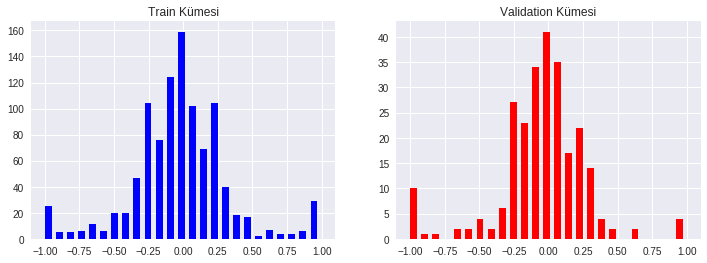

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].hist(Y_train, bins=cubuk_sayisi, width=0.05, color='blue')
axes[0].set_title('Train Kümesi')
axes[1].hist(Y_valid, bins=cubuk_sayisi, width=0.05, color='red')
axes[1].set_title('Validation Kümesi')

## Verileri ön işlemeye sokma
Preprocessing adı verilen aşama ile veriileri son hale sokmadan önce bir kaç işlemden geçirmemiz gerekmekte:


*  Gereksiz kısımları resimden kırpma
  * Gereksiz yerler işlenmeyeceğinden işlem gücünden kazanç sağlanır
*  Resim formatını RGB'den YUV'ye çevirme
  * *NVIDIA çalışanlarının söylemesine göre; onlar da bu format üzerinde veri işlemekte ve bu format RGB ve GreyScale (gri) formatından daha verimli*
  * Y: Parlaklık
  * U,V: Renk veren değerler
* Gaussion Blur ile resim yeniden şekillendirilir
  * Resimdeki gereksir yoğunluk kaldırılarak daha yumuşak hale getirilir.
* Resmin boyutunu küçültme
  * Resmin boyutu küçültülerek işlem gücü azaltılır.
  * Nvidia model mimarilerindeki varsayılan boyut: (200, 66) 
* Normalization (normalizasyon) işlemi
  * Verilerin 0-1 arsında olmasını sağlarayarak işlem gücünden tasarruf sağlamaya çalışmak (?)


In [0]:
# Verileri işlemek için metod
def resim_on_isleme(resim_yolu):
  # Yolu verilen resmi alma (matplotlib.image)
  resim = mpimg.imread(resim_yolu)
  
  # Resmin gereksiz kısımlarını resimden kırpna
  # 65 ve 135 ile arasındakileri işliyoruz.
  # Not: Buna resmin aksis değerlerine bakarak varsayımlarla karar veriyoruz
  resim = resim[60:135, :, :]
  
  # Resmi RGB formatından YUV formatına çevirme
  resim = cv2.cvtColor(resim, cv2.COLOR_RGB2YUV)
  
  # Gaussian Blur yöntemi ile resmi daha hafif hale getirme
  # Resim, Kernel boyutu, Kernel sapması
  resim = cv2.GaussianBlur(resim, (3, 3), 0)
  
  # İşlem gücünü düşürmek için resmi yeniden boyutlandırma
  # Resim, Yeni Boyut (Nvidia model mimarisi için kullanılan boyut 200,66)
  resim = cv2.resize(resim, (200, 66))
  
  # Normalizasyon işlemi ile verileri 0-1 arasına alıyoruz
  resim = resim / 255
  
  return resim
    

### Verileri ön işlemek için hazırladığmız fonksiyonu test etme ve kullanma

* Olası hatalı işlemde, verierin yanlış değişmemesinden emin olmak için öncelikle bir veri üzerinde test edilir
* Ardından hata çıkmazsa map fonksiyonu ile tüm verilere fonksiyon uygulanır

Text(0.5,1,'Ön işlenmiş resim')

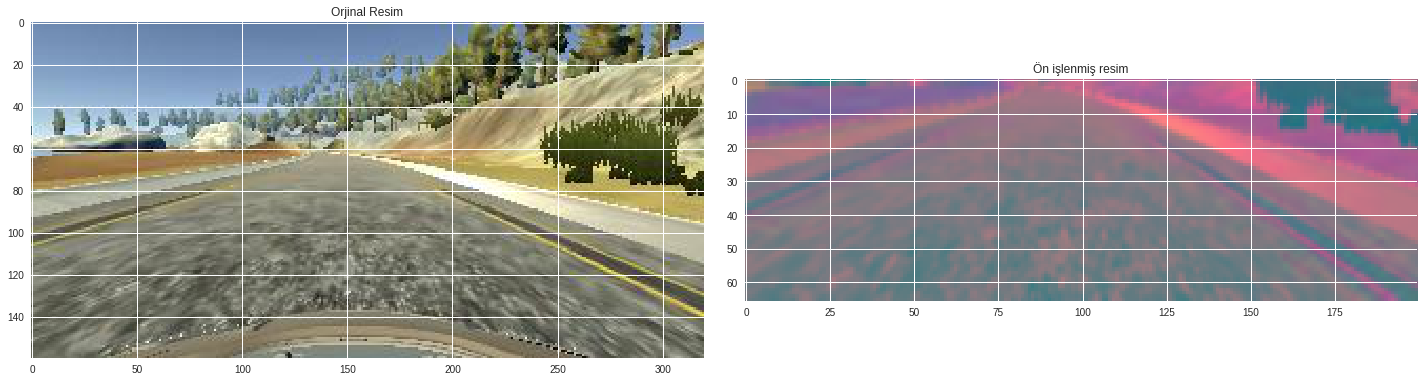

In [15]:
# Rastgele bir resmin yolunu alma
resim_yolu = resim_yollari[100]

# Orjinal ve işlenmiş resmi çizdirmek için kayıt altına alma
orjinal_resim = mpimg.imread(resim_yolu)
on_islenmis_resim = resim_on_isleme(resim_yolu)

# Aksis üzerinde şekli çizdirme
sekil, aksis = plt.subplots(1, 2, figsize=(20, 15))

# Şekilleri daha bitişik çizdirme
sekil.tight_layout()

# Aksisleri ayarlama
aksis[0].imshow(orjinal_resim)
aksis[0].set_title('Orjinal Resim')
aksis[1].imshow(on_islenmis_resim)
aksis[1].set_title('Ön işlenmiş resim')

In [0]:
  # Map fonksiyonu ile tüm verileri ön işlemeden geçirme
  X_train = np.array(list(map(resim_on_isleme, X_train)))
  X_valid = np.array(list(map(resim_on_isleme, X_valid)))

(1010, 66, 200, 3)


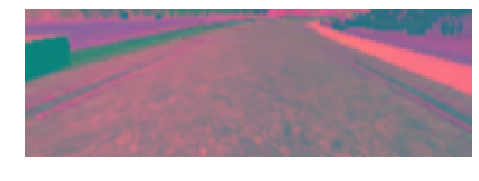

In [17]:
# Verilerin ön işlemesinin başarılı olup olmadığını kontrol etme
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis('off')
print(X_train.shape)

## Model Oluşturma
Behavioral Clonning için en uygun model tipi Nvidia Model olarak geçmektedir.
> Mnistte ve Trafik İşaretlerinde olduğu gibi düşük boyutta çok fazla veri olmadığınından diğer modeller verimsiz kalmaktadır.

* Nvidia modeli tanımlanır
* Model özeti ile tanımlanan model kontrol edilir
* Modele veriler eklenir
  * epoch için 30 değeri normale nazaran fazladır. Az veri olduğu için yüksek seçilmiştir.
* Relu activasyonu yerine elu aktivasyonu kullanılır.
  * Relu negatif değişimler için  0 değeri verdiğinde öğrenip oluşturmaz. Elu, relunun aksıne en fazla -1 de olsa öğrenime katkı sağlar.
* Model'in sonucunda *overfitting* oluyorsa bu durumu engellemek için *Dropout* katmanlarının sayısı arttırılır.
  * *Overfitting* Fazla öğretmeden kaynaklı kayıp. Düz çizgi yerine şekilli çizgi olur ve genelleştirmeyi engeller.

In [0]:
def nvidia_model():
    model = Sequential()
    # Filtre sayısı, kernel boyutu,
    model.add(Convolution2D(24, 5, 5, subsample=(2, 2), input_shape=(66, 200, 3), activation='elu'))
    model.add(Convolution2D(36, 5, 5, subsample=(2, 2), activation='elu'))
    model.add(Convolution2D(48, 5, 5, subsample=(2, 2), activation='elu'))
    model.add(Convolution2D(64, 3, 3, activation='elu'))
    
    model.add(Convolution2D(64, 3, 3, activation='elu'))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    
    model.add(Dense(100, activation='elu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(50, activation='elu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(10, activation='elu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(1)) # output
    
    model.compile(loss='mse', optimizer=Adam(lr=1e-3)) # 1e-3 = 10^-3
    return model
    

In [46]:
# Modeli tanımlama
model = nvidia_model()
print(model.summary())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="elu", strides=(2, 2))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  if __name__ == '__main__':


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
dropout_20 (Dropout)         (None, 1, 18, 64)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1152)              0         
__________

In [47]:
# Modele verileri atama
gecmis = model.fit(X_train, Y_train, epochs=30, validation_data=(X_valid, Y_valid), batch_size=100, verbose=1, shuffle=1)

Train on 1010 samples, validate on 253 samples
Epoch 1/30
1010/1010 [==============================] - 2s 2ms/step - loss: 3.1754 - val_loss: 0.3570
Epoch 2/30
1010/1010 [==============================] - 1s 692us/step - loss: 0.8366 - val_loss: 0.1079
Epoch 3/30
1010/1010 [==============================] - 1s 670us/step - loss: 0.2903 - val_loss: 0.1456
Epoch 4/30
1010/1010 [==============================] - 1s 657us/step - loss: 0.2270 - val_loss: 0.1107
Epoch 5/30
1010/1010 [==============================] - 1s 677us/step - loss: 0.1799 - val_loss: 0.0958
Epoch 6/30
1010/1010 [==============================] - 1s 667us/step - loss: 0.1761 - val_loss: 0.0934
Epoch 7/30
1010/1010 [==============================] - 1s 665us/step - loss: 0.1567 - val_loss: 0.0935
Epoch 8/30
1010/1010 [==============================] - 1s 673us/step - loss: 0.1493 - val_loss: 0.0898
Epoch 9/30
1010/1010 [==============================] - 1s 654us/step - loss: 0.1304 - val_loss: 0.0884
Epoch 10/30
1010/10

Text(0.5,0,'Epochs')

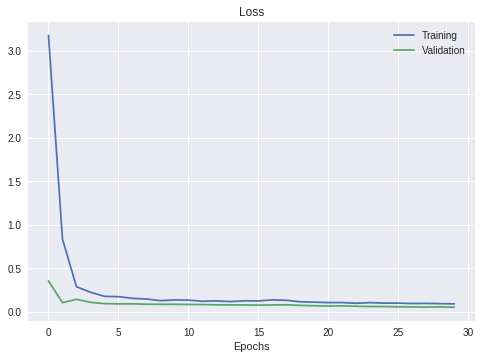

In [48]:
# Modelin sonucu grafiklere aktarma
plt.plot(gecmis.history['loss'])
plt.plot(gecmis.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Loss')
plt.xlabel('Epochs')

## Modeli Kaydetme ve İndirme
* Oluşturduğumuz modeli *model.save* ile *.h5* uzantısıyla kayıt ediyoruz.
* Kayıt edilen modeli *google.colab* kütüphanesindeki *files* modülü yardımıyla bilgisayarımıza indiriyoruz.
  * Hata oluşursa Chrome üzerinden deneyin.

In [0]:
# Modeli kaydetme
model.save('udacity-simulated-model.h5')

In [0]:
# Modeli indirme
from google.colab import files
files.download('udacity-simulated-model.h5')